## Louis Allain - TP initiation à CUDA


Au travers de ce TP, vous allez vous initier à CUDA au travers du langage PyCuda. Pycuda est une interface Python au langage CUDA, et plus spécifiquement un *wrapper* autour de fonctions C++.

La documentation en ligne est disponible à cette adresse : https://documen.tician.de/pycuda/

Avant de commencer, vous devez activer la prise en charge du GPU dans Collab. Pour ce faire allers dans :
 - Modifier->Paramètres du Notebook

et activer le GPU (Accélérateur matériel). 

La cellule suivante permet d'installer PyCuda dans votre environnement de travail Collab


In [1]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4534305 sha256=e24beb7f636532fa2e01448e17714268ed554de121303ec8b1b828dd02df6cfa
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59602 sha256=c6c7fdd4e75d12e0e25d30ae088f4449d589634f051f6757c208c3464aa17812
  Stored in directory: /root/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829cc24
Successfully built pycuda pytools


Voici un exemple simple (un kernel qui multiplie terme à terme les éléments d'un tableau), issu de la documentation de PyCuda. Avant de commencer, testez son exécution et vérifez la sortie du programme.

In [2]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy

from pycuda.compiler import SourceModule
mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1), grid=(1,1))

print(dest-a*b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.



# Question 1

Dans la première partie du TP, nous allons voir comment définir un noyau très simple, permettant d'inverser le contenu d'un tableau.



In [3]:
N = 100000
my_tab = numpy.arange(N).astype(numpy.int32)
print(my_tab)

[    0     1     2 ... 99997 99998 99999]


Commencez par coder votre kernel :


In [0]:
mod = SourceModule("""
__global__ void invert_tab(int *dest, int *a, int n){

  // TODO
  const int i = blockIdx.x * blockDim.x + threadIdx.x; 
  dest[i] = a[n-(i+1)];

}
""")

Puis testez le :

In [5]:
invert_tab = mod.get_function("invert_tab")

dest = numpy.zeros_like(my_tab)

# test du kernel ...

# TODO 0 0 0 0 0

dest = numpy.zeros_like(my_tab)

invert_tab(
        drv.Out(dest), drv.In(my_tab), numpy.int32(N),
        block=(400,1,1), grid=(250,1))

print(my_tab)
print(dest)

assert(((dest-my_tab[::-1])==0).all())

[    0     1     2 ... 99997 99998 99999]
[99999 99998 99997 ...     2     1     0]


# Question 2
Sur la même base, écrivez maintenant un kernel qui prend une matrice de données de taille NxN, et calcul un vecteur de taille N qui est la somme de chaque ligne de la matrice. 

Vous prendrez une grille de taille (4,4,1)

Testez.

In [6]:
N = 4
my_mat = numpy.random.randn(N,N).astype(numpy.int32)

mod = SourceModule("""

__global__ void calcul_somme_ligne(int *dest, int *mat, int n) {

  const int i = blockIdx.x * blockDim.x + threadIdx.x;
  const int j = blockIdx.y * blockDim.y + threadIdx.y;
  
  int pos = i + j;

  int val = mat[pos];
  int index = (pos - (pos % n)) / n;
  atomicAdd(&dest[index], val);
}
""")

calcul_somme_ligne = mod.get_function("calcul_somme_ligne")
dest = numpy.zeros_like(my_mat[0])


# test du kernel
calcul_somme_ligne(
          drv.Out(dest), drv.In(my_mat.flatten()),  numpy.int32(N),
          block=(N*N,1,1), grid=(1,1)
        )

print(my_mat)
print(dest)

[[ 2 -2  0  0]
 [ 1  0 -2  0]
 [ 0  0  0  0]
 [ 1  0 -1  0]]
[ 0 -1  0  0]


# Question 3 : Calcul d'un histogramme d'une image

Dans ce petit exemple on se propose d'écrire un noyau qui va calculer l'histogramme d'une image (tableau du nombre de pixels ayant une valeur dans un certain intervalle).

On commence par charger une image (depuis https://scipy-lectures.org/advanced/image_processing/) :


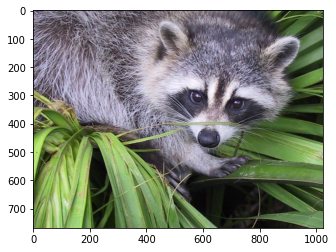

In [7]:
from scipy import misc
f = misc.face()

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

Notez que cette image est en couleur. Il faudra alors calculer un histogramme par composante de couleur.

On définira au préalable nombre de bins (i.e. nombre d'intervalles de valeurs pour l'histogramme)

In [0]:
nbins = 10 # 256 pour avoir un bin = 1 couleur

r


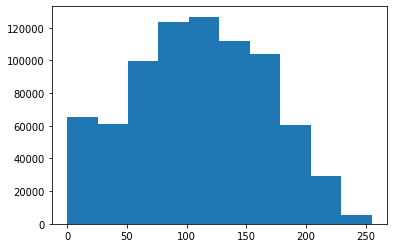

g


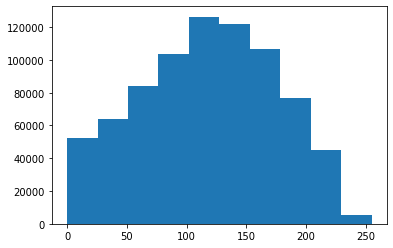

b


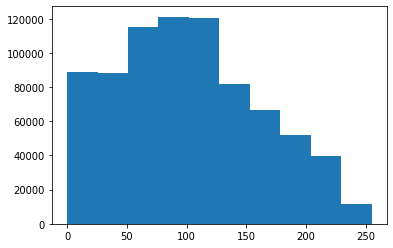

Tps exec : 
0.0066792964935302734


In [21]:
import time;

my_tab = f.astype(numpy.int32)

mod = SourceModule("""
__global__ void calcul_histogramme(int * dest, int * my_img, int n) {
  
  int p = ((blockDim.x * blockDim.y * gridDim.x * blockIdx.y) + 
            (blockDim.x * blockDim.y * blockIdx.x) + 
            (blockDim.x * threadIdx.y) +
            threadIdx.x) * 3;

  if(p < n) {

    int r = my_img[p];
    int g = my_img[p + 1];
    int b = my_img[p + 2];

    int idxR = r;
    int idxG = g + 256;
    int idxB = b + 512;

    atomicAdd(&dest[idxR], 1);
    atomicAdd(&dest[idxG], 1);
    atomicAdd(&dest[idxB], 1);

  }

}
""")

calcul_histo = mod.get_function("calcul_histogramme")

dest = numpy.zeros(768, dtype = "int32")

debut = time.time();

calcul_histo(drv.Out(dest), drv.In(my_tab), numpy.int32(2359296),
             block=(1000,1,1), grid=(272,272)) 

tps = time.time() - debut;

print('r')
plt.hist(x = numpy.arange(256), range = (0, 255), weights = dest.reshape(3, 256)[0], bins = nbins);
plt.show();

print('g')
plt.hist(x = numpy.arange(256), range = (0, 255), weights = dest.reshape(3, 256)[1], bins = nbins);
plt.show();

print('b')
plt.hist(x = numpy.arange(256), range = (0, 255), weights = dest.reshape(3, 256)[2], bins = nbins);
plt.show();

print("Tps exec : ")
print(tps)

une fois que vous aurez terminé, vous comparez le temps d'exécution avec un code python qui calcule l'histogramme à l'aide d'une boucle sur tous les pixels

r


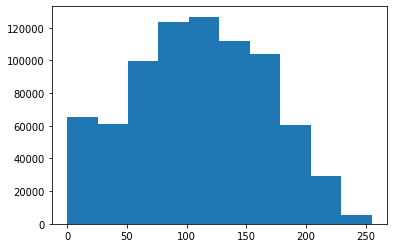

g


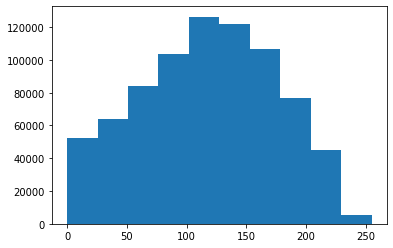

b


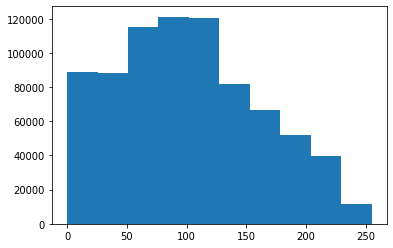

Tps exec : 
8.345336437225342


In [22]:
def calcul_histo(img):
  r = numpy.zeros(256).astype(numpy.int32);
  g = numpy.zeros(256).astype(numpy.int32);
  b = numpy.zeros(256).astype(numpy.int32);
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      r[img[i][j][0]] += 1;
      g[img[i][j][1]] += 1;
      b[img[i][j][2]] += 1;
  return r, g, b;

debut = time.time();

histoR, histoG, histoB = calcul_histo(my_tab);

tps = time.time() - debut;

print('r');
plt.hist(x = numpy.arange(256), range = (0, 255), weights = histoR, bins = nbins);
plt.show();

print('g');
plt.hist(x = numpy.arange(256), range = (0, 255), weights = histoG, bins = nbins);
plt.show();

print('b');
plt.hist(x = numpy.arange(256), range = (0, 255), weights = histoB, bins = nbins);
plt.show();

print("Tps exec : ")
print(tps)